### Training of ML algorithms on our Original Dataset

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [18]:
data = pd.read_csv('Datasets/sp500_sentiment_non_weighted.csv')
data.Price_change = data.Price_change.astype(int)
data

,Unnamed: 0,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,0,2010-01-05,1.111477e+07,1136.520020,0.157785,0.489590,0.352625,1
1,1,2010-01-06,9.592200e+06,1137.140015,0.159253,0.114102,0.726645,1
2,2,2010-01-07,1.264640e+07,1141.689941,0.441000,0.012006,0.546994,1
3,3,2010-01-08,1.508503e+07,1144.979980,0.039152,0.384472,0.576376,1
4,4,2010-01-11,7.396000e+06,1146.979980,0.114053,0.029774,0.856173,1
...,...,...,...,...,...,...,...,...
2603,2603,2020-06-05,2.503270e+07,3193.929932,0.567891,0.070503,0.361606,1
2604,2604,2020-06-08,2.303770e+07,3232.389893,0.523481,0.124646,0.351873,1
2605,2605,2020-06-09,2.969893e+07,3207.179932,0.296441,0.337487,0.366072,-1
2606,2606,2020-06-10,3.795272e+07,3190.139893,0.390972,0.240399,0.368628,-1


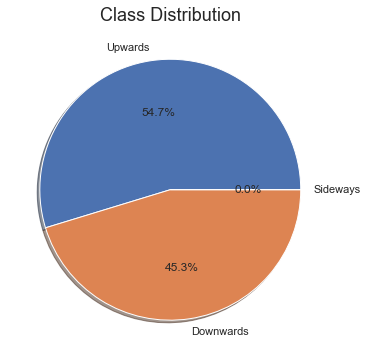

,Unnamed: 0,Volume,Close,Positive,Negative,Neutral,Price_change
count,2608.000000,2.608000e+03,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,1303.500000,1.658071e+07,2011.289005,0.251019,0.178131,0.570850,0.094325
std,753.009075,1.012408e+07,614.019978,0.132117,0.124667,0.156313,0.995732
min,0.000000,9.112000e+03,1022.580017,0.007660,0.008018,0.032180,-1.000000
25%,651.750000,1.015416e+07,1405.375000,0.155623,0.084762,0.471117,-1.000000
50%,1303.500000,1.419585e+07,2021.200012,0.238662,0.156607,0.567077,1.000000
75%,1955.250000,2.006385e+07,2538.672485,0.327286,0.242390,0.672033,1.000000
max,2607.000000,1.087524e+08,3386.149902,0.891684,0.960160,0.949033,1.000000


In [19]:
ones = len(data[data['Price_change']==1])
minus = len(data[data['Price_change']==-1])
zeros = len(data[data['Price_change']==0])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[ones, minus, zeros], labels=['Upwards','Downwards','Sideways'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution', fontsize=18)
plt.show()

data.describe()

In [20]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral']])
y = np.array(data['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)

In [22]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver='newton-cg',multi_class='multinomial')
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5737514518002322


In [25]:
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True)
           #'precision' : make_scorer(precision_score, zero_division=0),
           #'recall' : make_scorer(recall_score, average='macro'),  }
          }

cv_scores = cross_validate(logisticRegr, X, y, cv=10, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  0.5732802829354553
Mean f1_macro 0.5127483052136188


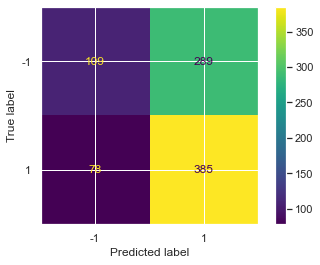

In [26]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

<AxesSubplot:xlabel='Positive', ylabel='Negative'>

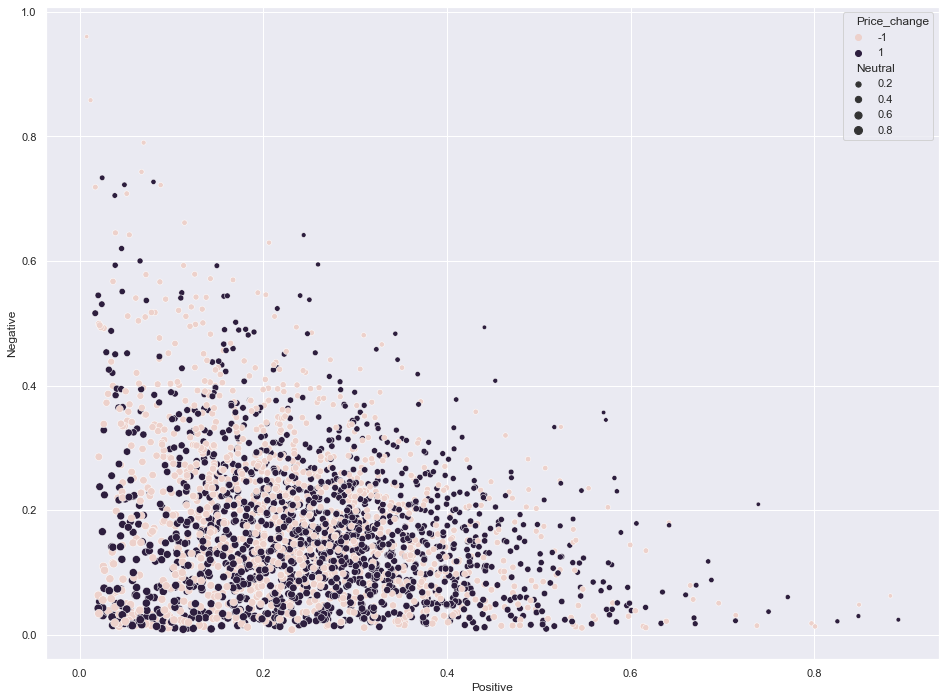

In [28]:
fig , ax = plt.subplots(figsize=(16,12))
sns.scatterplot(data=data, x="Positive", y="Negative", size='Neutral', hue = 'Price_change')

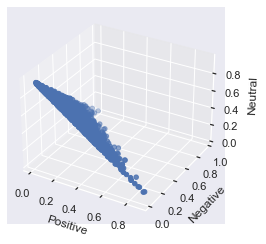

In [29]:
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x_plot = data['Positive']
y_plot = data['Negative']
z_plot = data['Neutral']

ax.set_xlabel("Positive")
ax.set_ylabel("Negative")
ax.set_zlabel("Neutral")

ax.scatter(x_plot, y_plot, z_plot)

plt.show()

## Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
score


0.5632984901277585

In [32]:
cv_scores = cross_validate(knn, X, y, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  0.574028724601231
Mean f1_macro 0.5375105405113085


## Add Volume as feature

In [38]:
# Normalize volume feature
data['Volume'] = (data['Volume'] - data['Volume'].min())/(data['Volume'].max()-data['Volume'].min())
data

,Unnamed: 0,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,0,2010-01-05,0.102127,1136.520020,0.157785,0.489590,0.352625,1
1,1,2010-01-06,0.088126,1137.140015,0.159253,0.114102,0.726645,1
2,2,2010-01-07,0.116212,1141.689941,0.441000,0.012006,0.546994,1
3,3,2010-01-08,0.138638,1144.979980,0.039152,0.384472,0.576376,1
4,4,2010-01-11,0.067930,1146.979980,0.114053,0.029774,0.856173,1
...,...,...,...,...,...,...,...,...
2603,2603,2020-06-05,0.230116,3193.929932,0.567891,0.070503,0.361606,1
2604,2604,2020-06-08,0.211770,3232.389893,0.523481,0.124646,0.351873,1
2605,2605,2020-06-09,0.273027,3207.179932,0.296441,0.337487,0.366072,-1
2606,2606,2020-06-10,0.348928,3190.139893,0.390972,0.240399,0.368628,-1


In [39]:
# Input features and labels
X = np.array(data[['Positive', 'Negative', 'Neutral', 'Volume']])
y = np.array(data['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True)

In [40]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(multi_class='multinomial')
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5900116144018583


In [50]:
cv_scores = cross_validate(logisticRegr, X, y, cv=5, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)

Mean accs :  0.5747957435229922
Mean f1_macro 0.5192270899197161


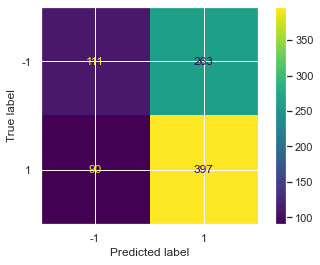

In [51]:
predictions = logisticRegr.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

## 2-classes Dataset loading
Load the dataset with 2 classes (increase/decrease in price of stock).
`Datasets/8_comps_2_labels.csv`

In [3]:
df = pd.read_csv('Datasets/8_comps_2_labels.csv', index_col=0, parse_dates=['date'])
df

,date,stock,Open,Close,Volume,Positive,Negative,Neutral,Price_change
0,2020-03-09,AAPL,65.937500,66.542503,286744800,0.046127,0.411465,0.542409,-1
1,2020-03-10,AAPL,69.285004,71.334999,285290000,0.070845,0.449025,0.480130,1
2,2020-03-11,AAPL,69.347504,68.857498,255598800,0.190995,0.453761,0.355244,-1
3,2020-03-12,AAPL,63.985001,62.057499,418474000,0.204221,0.447518,0.348261,-1
4,2020-03-13,AAPL,66.222504,69.492500,370732000,0.315863,0.218127,0.466010,1
...,...,...,...,...,...,...,...,...,...
3843,2020-05-29,LMT,396.040009,388.440002,1733800,0.243090,0.565334,0.191576,-1
3844,2020-06-02,LMT,388.640015,389.769989,1404700,0.173455,0.011468,0.815077,1
3845,2020-06-04,LMT,401.779999,403.670013,1261700,0.033993,0.045346,0.920662,1
3846,2020-06-05,LMT,410.000000,410.750000,1702500,0.953540,0.023839,0.022620,1


In [4]:
df.describe()

,Open,Close,Volume,Positive,Negative,Neutral,Price_change
count,3848.000000,3848.000000,3.848000e+03,3848.000000,3848.000000,3848.000000,3848.000000
mean,105.699758,105.797344,4.239413e+07,0.305457,0.205478,0.489065,0.056133
std,233.802328,234.314394,4.726980e+07,0.291379,0.268085,0.305910,0.998553
min,2.965000,2.932500,5.244000e+05,0.006782,0.006318,0.010377,-1.000000
25%,24.172500,24.120001,2.692850e+06,0.058023,0.023009,0.210997,-1.000000
50%,47.849998,47.776249,3.059680e+07,0.208151,0.066093,0.491222,1.000000
75%,87.966877,88.215000,6.405588e+07,0.474250,0.299208,0.774768,1.000000
max,2645.000000,2647.449951,4.184740e+08,0.958878,0.974933,0.952413,1.000000


Plot the data in 3D

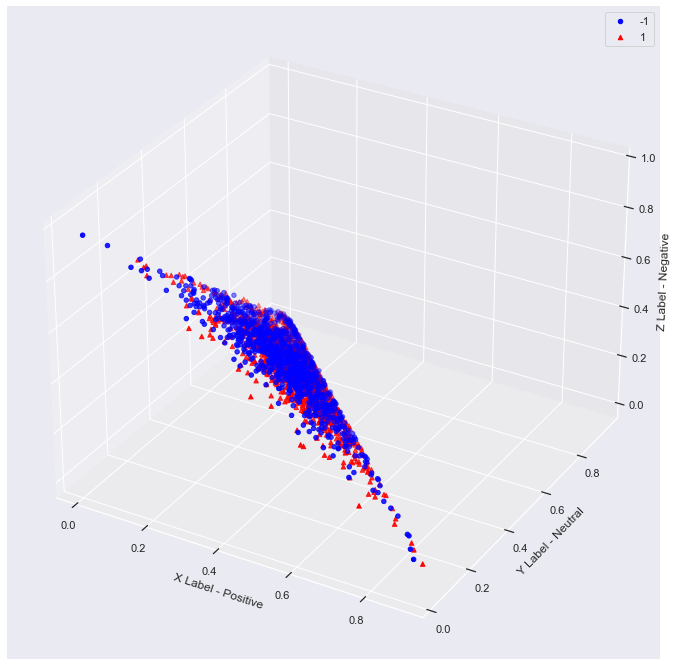

In [44]:
df=data
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

classes = {-1: 'negative class', 1: 'positive class'}

for class_key in classes:
    cur_xs = df[df['Price_change'] == class_key]['Positive'].tolist()
    cur_ys = df[df['Price_change'] == class_key]['Neutral'].tolist()
    cur_zs = df[df['Price_change'] == class_key]['Negative'].tolist()
    if class_key == -1:
        marker = 'o'
        color = 'blue'
    else:
        marker = '^'
        color = 'red'
    ax.scatter(cur_xs, cur_ys, cur_zs, marker=marker, c=color, label=class_key)

ax.set_xlabel('X Label - Positive')
ax.set_ylabel('Y Label - Neutral')
ax.set_zlabel('Z Label - Negative')

ax.legend(loc=0, scatterpoints = 1)
plt.show()

Replot the data in 2D taking into consideration only Positive and Negative

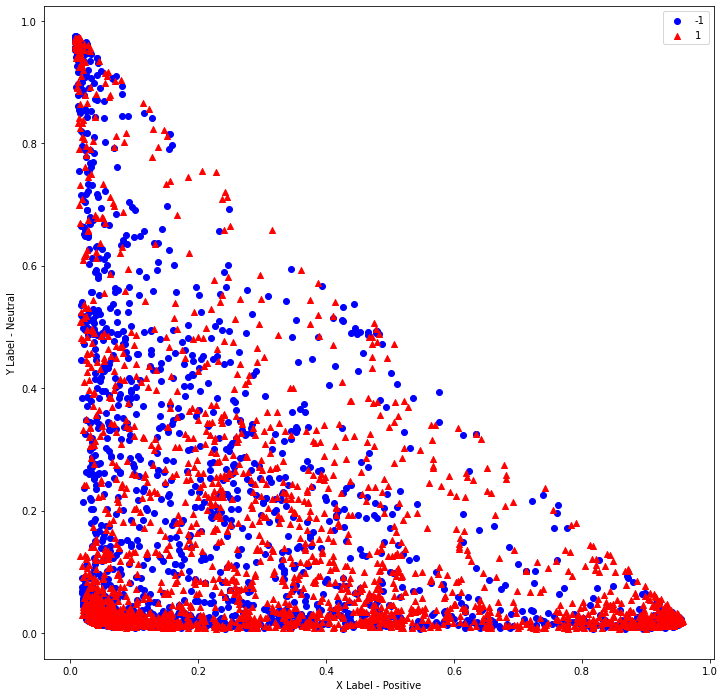

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
classes = {-1: 'negative class', 1: 'positive class'}

for class_key in classes:
    cur_xs = df[df['Price_change'] == class_key]['Positive'].tolist()
    cur_ys = df[df['Price_change'] == class_key]['Negative'].tolist()
    if class_key == -1:
        marker = 'o'
        color = 'blue'
    else:
        marker = '^'
        color = 'red'
    ax.scatter(cur_xs, cur_ys, marker=marker, c=color, label=class_key)

ax.set_xlabel('X Label - Positive')
ax.set_ylabel('Y Label - Neutral')

ax.legend()
plt.show()

In [82]:
# Input features and labels
X = np.array(df[['Positive', 'Negative', 'Neutral']])
y = np.array(df['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [83]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3078, 3), (3078,), (770, 3), (770,))

## SVM

In [45]:
from sklearn import svm

for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    clf.predict(X_test)
    print(f'Kernel: {kernel}, score: {clf.score(X_test, y_test)}')

Kernel: sigmoid, score: 0.5493612078977933
Kernel: poly, score: 0.5853658536585366
Kernel: rbf, score: 0.59465737514518
Kernel: linear, score: 0.5679442508710801


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.5737514518002322

In [48]:
clf.feature_importances_

array([0.56125451, 0.06156394, 0.1181734 , 0.25900814])